# Stock Price Prediction (Part 2 of 2)

**Problem Statement**

The objective is to create a predictive model to forecast future stock closing prices.

For the purpose of this presentation I will be showcasing the AMD stock ticker. 

**Model Explored**

|Models|Description|
|---|---|
|GRU|Gated Recurrent Unit|
|LSTM|Long Short-Term Memory|

**Workflow Process**  
1. Notebook 1 of 2 : ARIMA & SARIMAX : Data Collection
2. Notebook 1 of 2 : ARIMA & SARIMAX : General EDA
3. Notebook 1 of 2 : ARIMA & SARIMAX : Pre-Processing
4. Notebook 1 of 2 : ARIMA & SARIMAX : Modeling
5. Notebook 2 of 2 : GRU & LSTM : Data Collection
6. Notebook 2 of 2 : GRU & LSTM : General EDA
7. Notebook 2 of 2 : GRU & LSTM : Pre-Processing
7. Notebook 2 of 2 : GRU & LSTM : Modeling

# 0.0 Libraries Import

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
# 1.0 Data Import
from secrets2 import key
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

from tensorflow.keras.layers import LSTM
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

import warnings
warnings.simplefilter(action='ignore')

# 1.0 Data Import

In [2]:
# from secrets2 import key

In [3]:
# df = pdr.get_data_tiingo('AMD', api_key=key)

In [4]:
# df.to_csv('AMD.csv')

In [5]:
df = pd.read_csv('AMD.csv')

In [6]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AMD,2016-12-19 00:00:00+00:00,10.95,11.000,10.520,10.81,46085840,10.95,11.000,10.520,10.81,46085840,0.0,1.0
1,AMD,2016-12-20 00:00:00+00:00,11.51,11.510,11.150,11.19,59314159,11.51,11.510,11.150,11.19,59314159,0.0,1.0
2,AMD,2016-12-21 00:00:00+00:00,11.47,11.720,11.310,11.61,44814131,11.47,11.720,11.310,11.61,44814131,0.0,1.0
3,AMD,2016-12-22 00:00:00+00:00,11.60,11.750,11.470,11.65,36450756,11.60,11.750,11.470,11.65,36450756,0.0,1.0
4,AMD,2016-12-23 00:00:00+00:00,11.58,11.600,11.260,11.30,32288235,11.58,11.600,11.260,11.30,32288235,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,AMD,2021-12-10 00:00:00+00:00,138.55,141.365,135.820,141.29,42224275,138.55,141.365,135.820,141.29,42224275,0.0,1.0
1254,AMD,2021-12-13 00:00:00+00:00,133.80,139.400,133.415,138.25,42173963,133.80,139.400,133.415,138.25,42173963,0.0,1.0
1255,AMD,2021-12-14 00:00:00+00:00,135.60,137.240,130.600,131.67,50754642,135.60,137.240,130.600,131.67,50754642,0.0,1.0
1256,AMD,2021-12-15 00:00:00+00:00,146.50,146.690,133.810,135.11,72425783,146.50,146.690,133.810,135.11,72425783,0.0,1.0


# 2.0 General EDA
___

* 2.1 Pre-processing of dates and prefered columns
* 2.2 Time Series Plot
* 2.3 Trend & Seasonality

### 2.1 Pre-processing of Dates and Prefered Columns
___

In [7]:
df['date'] = df['date'].map(lambda x : x[:-14])

In [8]:
train_dates = pd.to_datetime(df['date'])

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df2 = pd.DataFrame(df[['close','high','low','open','volume','adjClose']].groupby(df.index).sum())

In [11]:
df1 = pd.DataFrame(df[['close','high','low','open','volume','adjClose']].groupby(df.index).sum())

### 2.2 Time Series Plot
___

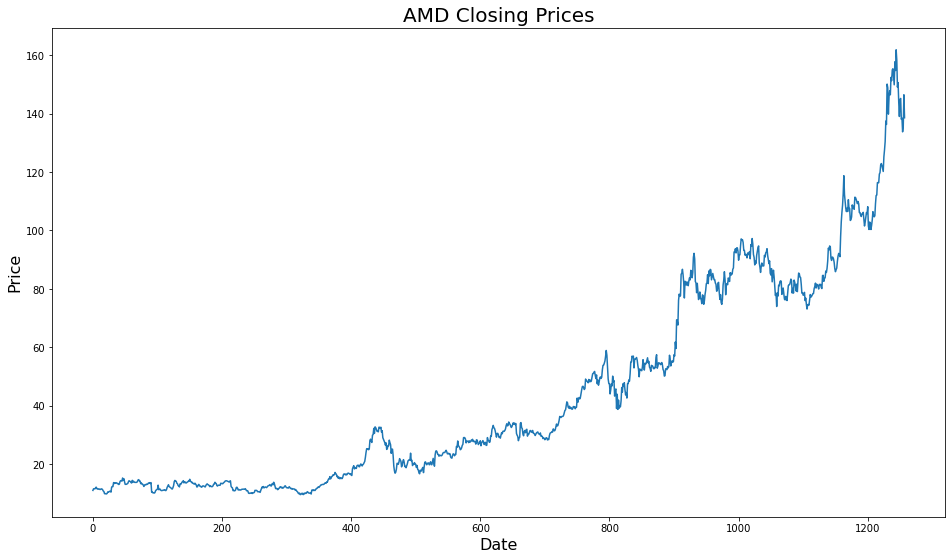

In [12]:
plt.figure(figsize=(16,9))
plt.title('AMD Closing Prices', fontsize=20)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.plot(df2['adjClose'])

### 2.3 Trend & Seasonality
___

In [13]:
returns = df1['close'].pct_change() # Used for univariate example

column_names = df1.columns
x = df1.values # Returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2 = pd.DataFrame(x_scaled)

In [14]:
pct_c_df = df2

In [15]:
pct_c_df.columns = column_names

In [16]:
pct_c_df

,close,high,low,open,volume,adjClose
0,0.009319,0.007951,0.010064,0.011219,0.111624,0.009319
1,0.012994,0.011248,0.014348,0.013684,0.153749,0.012994
2,0.012731,0.012606,0.015436,0.016407,0.107574,0.012731
3,0.013584,0.012800,0.016524,0.016667,0.080941,0.013584
4,0.013453,0.011830,0.015096,0.014397,0.067686,0.013453
...,...,...,...,...,...,...
1253,0.846699,0.850702,0.862097,0.857393,0.099327,0.846699
1254,0.815527,0.837999,0.845743,0.837678,0.099167,0.815527
1255,0.827340,0.824036,0.826601,0.795006,0.126491,0.827340
1256,0.898871,0.885126,0.848429,0.817315,0.195502,0.898871


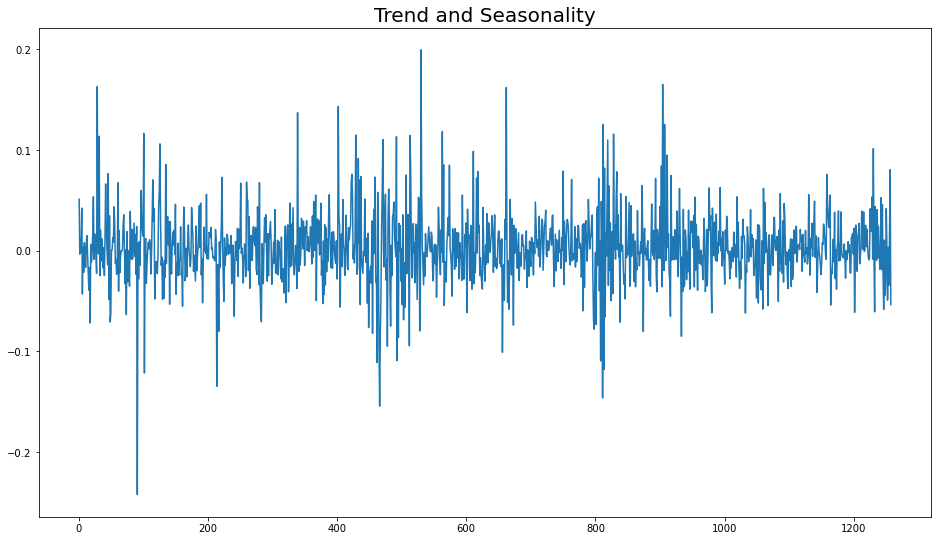

In [17]:
plt.figure(figsize=(16,9))
plt.title('Trend and Seasonality', fontsize=20)
plt.plot(returns)

<AxesSubplot:title={'center':'Seasonality Distribution'}>

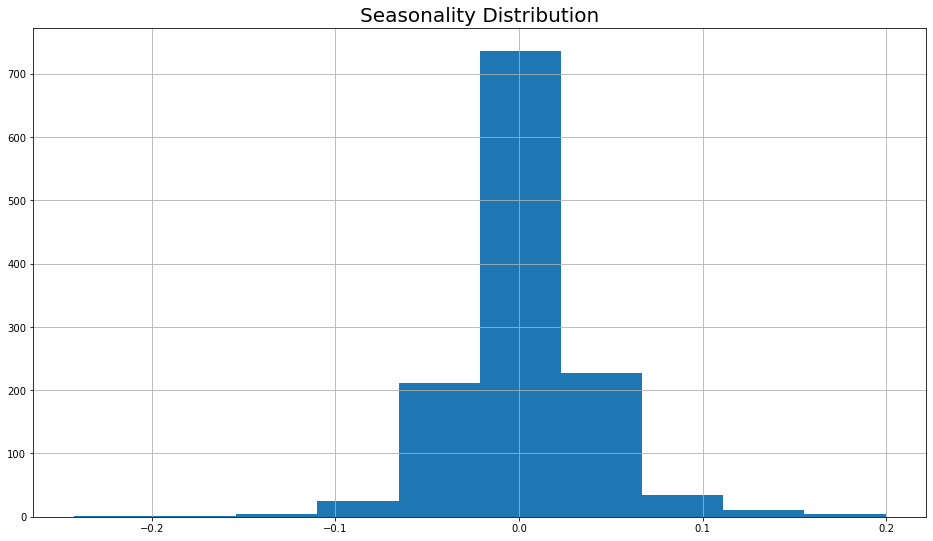

In [18]:
plt.figure(figsize=(16,9))
plt.title('Seasonality Distribution', fontsize=20)
returns.hist()

# 3.0 Pre-Processing
___

* 3.1 Apply MinMaxScaler
* 3.2 Prepare Dimensions

### 3.1 Apply MinMaxScaler
___

In [19]:
npa = returns.values[1:].reshape(-1,1)
print(len(npa))

scale = MinMaxScaler(feature_range=(0,1))
npa = scale.fit_transform(npa)
print(len(npa))

1257
1257


### 3.2 Prepare Dimensions
___

In [20]:
# Need the data to be in the form [sample, time steps, features (dimension of each element)]
samples = 90 # Number of samples (in past)
steps = 90 # Number of steps (in future)
X = [] # X array
Y = [] # Y array

for i in range(pct_c_df.shape[0] - samples):
    X.append(pct_c_df.iloc[i:i+samples, 0:5].values) # Independent Samples
    Y.append(pct_c_df.iloc[i+samples, 5:].values) # Dependent Samples
print('Training Data: Length is ',len(X[0:1][0]),': ', X[0:1])
print('Testing Data: Length is ',len(Y[0:1]),': ', Y[0:1])

Training Data: Length is  90 :  [array([[0.00931881, 0.00795139, 0.01006392, 0.0112192 , 0.11162372],
       [0.01299383, 0.01124831, 0.01434789, 0.01368353, 0.15374874],
       [0.01273133, 0.01260587, 0.01543588, 0.01640726, 0.10757401],
       [0.01358446, 0.0127998 , 0.01652387, 0.01666667, 0.0809412 ],
       [0.01345321, 0.01183012, 0.01509588, 0.01439689, 0.06768583],
       [0.01666885, 0.0149331 , 0.01740786, 0.01666667, 0.10605298],
       [0.01325633, 0.01713105, 0.01645587, 0.02075227, 0.19177212],
       [0.01351883, 0.01195941, 0.01339589, 0.01400778, 0.12483419],
       [0.0118782 , 0.01299374, 0.01502788, 0.01699092, 0.10528514],
       [0.01246883, 0.01215335, 0.01346389, 0.0151751 , 0.14058992],
       [0.01246883, 0.01131554, 0.01492588, 0.01536965, 0.09473128],
       [0.01122195, 0.01241193, 0.01489188, 0.01523995, 0.08859809],
       [0.01174695, 0.01111902, 0.01407589, 0.01433204, 0.0745809 ],
       [0.01286258, 0.0120887 , 0.01543588, 0.01485084, 0.08366086],
 

In [21]:
# Reshape the data so that the inputs will be acceptable to the model
X = np.array(X)
Y = np.array(Y)
print('Dimensions of X', X.shape, 'Dimenstions of Y', Y.shape)

Dimensions of X (1168, 90, 5) Dimenstions of Y (1168, 1)


# 4.0 Modeling
___

* 4.1 Split Data (80% Train -20% Split)
* 4.2 Instantiate GRU Model
* 4.3 Plotting the Loss Interaction
* 4.4 Plot Predictions
* 4.5 Evaluate Predictions
* 4.6 Plot 90-Day Forecast
* 4.7 Split Data (80% Train -20% Split)
* 4.8 Instantiate LSTM Model
* 4.9 Plotting the Loss Interaction
* 4.10 Plot Predictions
* 4.11 Evaluate Predictions
* 4.12 Plot 90-Day Forecast

### 4.1 Split Data (80% Train -20% Split)
___

In [22]:
# Get the training and testing set
threshold = round(0.8 * X.shape[0])
trainX, trainY = X[:threshold], Y[:threshold]
testX, testY = X[threshold:], Y[threshold:]

print('Training Length:',trainX.shape, trainY.shape,'Testing Length:', testX.shape, testY.shape)

Training Length: (934, 90, 5) (934, 1) Testing Length: (234, 90, 5) (234, 1)


### 4.2 Instantiate GRU Model
___

In [23]:
model = keras.Sequential()

model.add(layers.GRU(128,
                     activation = "tanh",
                     recurrent_activation = "sigmoid",
                     input_shape = (X.shape[1], X.shape[2]),
                     return_sequences = True
                    ))

model.add(layers.GRU(64,activation= 'tanh', recurrent_activation = "sigmoid"))
          
model.add(layers.Dropout(rate=0.2))
          
model.add(layers.Dense(1))
          
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
          
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 90, 128)           51840     
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                37248     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 89,153
Trainable params: 89,153
Non-trainable params: 0
_________________________________________________________________


### 4.3 Plotting the Loss Interaction
___

In [24]:
# Fitting the data
history = model.fit(X[:threshold],
                    Y[:threshold],
                    shuffle = False,
                    epochs = 100,
                    batch_size = 32,
                    validation_split = 0.2,
                    verbose = 1
)

Epoch 1/100
24/24 [==============================] - 3s 56ms/step - loss: 0.0015 - val_loss: 0.0027
Epoch 2/100
24/24 [==============================] - 1s 38ms/step - loss: 0.0032 - val_loss: 0.0095
Epoch 3/100
24/24 [==============================] - 1s 39ms/step - loss: 0.0057 - val_loss: 0.0013
Epoch 4/100
24/24 [==============================] - 1s 39ms/step - loss: 0.0016 - val_loss: 9.1584e-04
Epoch 5/100
24/24 [==============================] - 1s 38ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 6/100
24/24 [==============================] - 1s 37ms/step - loss: 8.9576e-04 - val_loss: 0.0023
Epoch 7/100
24/24 [==============================] - 1s 38ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 8/100
24/24 [==============================] - 1s 37ms/step - loss: 5.2413e-04 - val_loss: 8.4279e-04
Epoch 9/100
24/24 [==============================] - 1s 38ms/step - loss: 3.8041e-04 - val_loss: 7.0171e-04
Epoch 10/100
24/24 [==============================] - 1s 38ms/step - loss: 4

24/24 [==============================] - 1s 38ms/step - loss: 1.5462e-04 - val_loss: 3.6621e-04
Epoch 77/100
24/24 [==============================] - 1s 40ms/step - loss: 4.4075e-04 - val_loss: 3.1569e-04
Epoch 78/100
24/24 [==============================] - 1s 39ms/step - loss: 1.9412e-04 - val_loss: 3.3064e-04
Epoch 79/100
24/24 [==============================] - 1s 38ms/step - loss: 5.2904e-04 - val_loss: 3.2735e-04
Epoch 80/100
24/24 [==============================] - 1s 39ms/step - loss: 2.1592e-04 - val_loss: 3.8568e-04
Epoch 81/100
24/24 [==============================] - 1s 38ms/step - loss: 6.7836e-04 - val_loss: 4.6082e-04
Epoch 82/100
24/24 [==============================] - 1s 38ms/step - loss: 2.6043e-04 - val_loss: 5.8822e-04
Epoch 83/100
24/24 [==============================] - 1s 38ms/step - loss: 7.0442e-04 - val_loss: 7.5458e-04
Epoch 84/100
24/24 [==============================] - 1s 39ms/step - loss: 2.0804e-04 - val_loss: 3.1215e-04
Epoch 85/100
24/24 [============

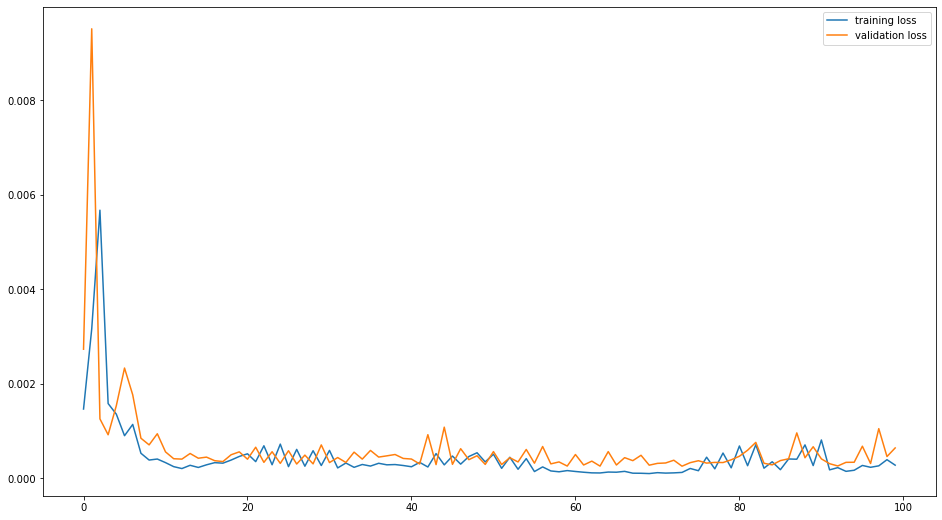

In [25]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend();

# Note:
# if training loss >> validation loss -> Underfitting
# if training loss << validation loss -> Overfitting

### 4.4 Plot Predictions
___

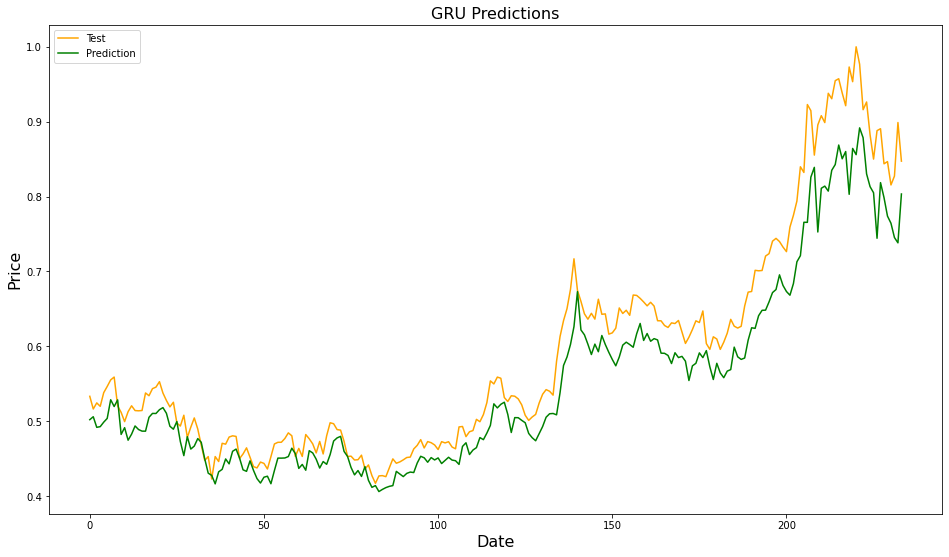

In [26]:
plt.figure(figsize=(16,9))
y_pred = model.predict(testX)
plt.plot(testY, color = 'orange', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'Prediction')
plt.title(label = 'GRU Predictions', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.legend();

### 4.5 Evaluate Predictions
___

In [27]:
def mape(actual, pred): 
    actual, pred = np.array(testY), np.array(y_pred)
    return np.mean(np.abs((testY - y_pred) / actual)) * 100

In [28]:
result = mape(testY,y_pred)

In [29]:
print(f'The average difference between the predicted value and the actual value is {result}%')

The average difference between the predicted value and the actual value is 6.300295714013679%


### 4.6 Plot 90-Day Forecast
___

In [30]:
n_future = 90

forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='2d').tolist()
forecast = model.predict(trainX[-n_future:])

In [31]:
forecast_copies = np.repeat(forecast, df1.shape[1], axis=-1)

In [32]:
forecast_copies.shape

(90, 6)

In [33]:
y_pred_future = min_max_scaler.inverse_transform(forecast_copies)[:,0]

In [34]:
y_pred_future.shape

(90,)

In [35]:
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())

In [36]:
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'open': y_pred_future})
df_forecast['date'] = pd.to_datetime(df_forecast['date'])

In [37]:
original = df[['date', 'open']]
original['date'] = pd.to_datetime(original['date'])
original = original.loc[original['date'] >= '2020-01-01']

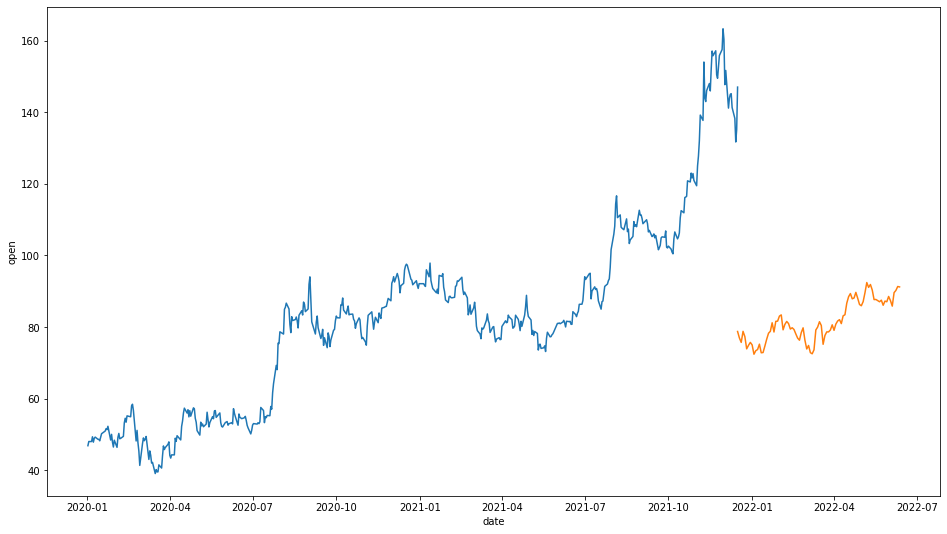

In [38]:
import seaborn as sns

plt.figure(figsize=(16,9))
sns.lineplot(original['date'], original['open'])
sns.lineplot(df_forecast['date'], df_forecast['open']);

### 4.7 Split Data (80% Train -20% Split)
___

In [39]:
# Get the training and testing set
threshold = round(0.8 * X.shape[0])
trainX, trainY = X[:threshold], Y[:threshold]
testX, testY = X[threshold:], Y[threshold:]

print('Training Length:',trainX.shape, trainY.shape,'Testing Length:', testX.shape, testY.shape)

Training Length: (934, 90, 5) (934, 1) Testing Length: (234, 90, 5) (234, 1)


### 4.8 Instantiate LSTM Model
___

In [40]:
model = keras.Sequential()
model.add(LSTM(128,
               activation= 'tanh',
               input_shape=(X.shape[1], X.shape[2]),
               recurrent_activation = "sigmoid",
               return_sequences = True
              ))
model.add(LSTM(64,activation= 'tanh',recurrent_activation = "sigmoid"))
model.add(Dropout(0.2))
model.add(Dense((testY.shape[1])))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 128)           68608     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 118,081
Trainable params: 118,081
Non-trainable params: 0
_________________________________________________________________


### 4.9 Plotting Loss Interaction
___

In [41]:
# Fitting the data
history = model.fit(X[:threshold],
                    Y[:threshold],
                    shuffle = False,
                    epochs = 100,
                    batch_size = 32,
                    validation_split = 0.2,
                    verbose = 1
)

Epoch 1/100
24/24 [==============================] - 3s 55ms/step - loss: 0.0014 - val_loss: 0.0036
Epoch 2/100
24/24 [==============================] - 1s 39ms/step - loss: 0.0023 - val_loss: 0.0059
Epoch 3/100
24/24 [==============================] - 1s 39ms/step - loss: 0.0025 - val_loss: 0.0059
Epoch 4/100
24/24 [==============================] - 1s 39ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 5/100
24/24 [==============================] - 1s 40ms/step - loss: 6.0646e-04 - val_loss: 9.3407e-04
Epoch 6/100
24/24 [==============================] - 1s 40ms/step - loss: 4.5399e-04 - val_loss: 7.5874e-04
Epoch 7/100
24/24 [==============================] - 1s 39ms/step - loss: 5.3651e-04 - val_loss: 9.2408e-04
Epoch 8/100
24/24 [==============================] - 1s 39ms/step - loss: 7.7394e-04 - val_loss: 8.1575e-04
Epoch 9/100
24/24 [==============================] - 1s 39ms/step - loss: 5.5298e-04 - val_loss: 9.8612e-04
Epoch 10/100
24/24 [==============================] - 1s 39m

Epoch 77/100
24/24 [==============================] - 1s 40ms/step - loss: 1.7027e-04 - val_loss: 3.9431e-04
Epoch 78/100
24/24 [==============================] - 1s 39ms/step - loss: 3.9249e-04 - val_loss: 5.1646e-04
Epoch 79/100
24/24 [==============================] - 1s 39ms/step - loss: 2.8307e-04 - val_loss: 5.1832e-04
Epoch 80/100
24/24 [==============================] - 1s 40ms/step - loss: 5.6994e-04 - val_loss: 3.6798e-04
Epoch 81/100
24/24 [==============================] - 1s 41ms/step - loss: 2.2918e-04 - val_loss: 3.5314e-04
Epoch 82/100
24/24 [==============================] - 1s 39ms/step - loss: 4.9458e-04 - val_loss: 3.6976e-04
Epoch 83/100
24/24 [==============================] - 1s 41ms/step - loss: 2.9153e-04 - val_loss: 4.1133e-04
Epoch 84/100
24/24 [==============================] - 1s 41ms/step - loss: 5.7237e-04 - val_loss: 3.6160e-04
Epoch 85/100
24/24 [==============================] - 1s 41ms/step - loss: 1.7792e-04 - val_loss: 3.1882e-04
Epoch 86/100
24/24 

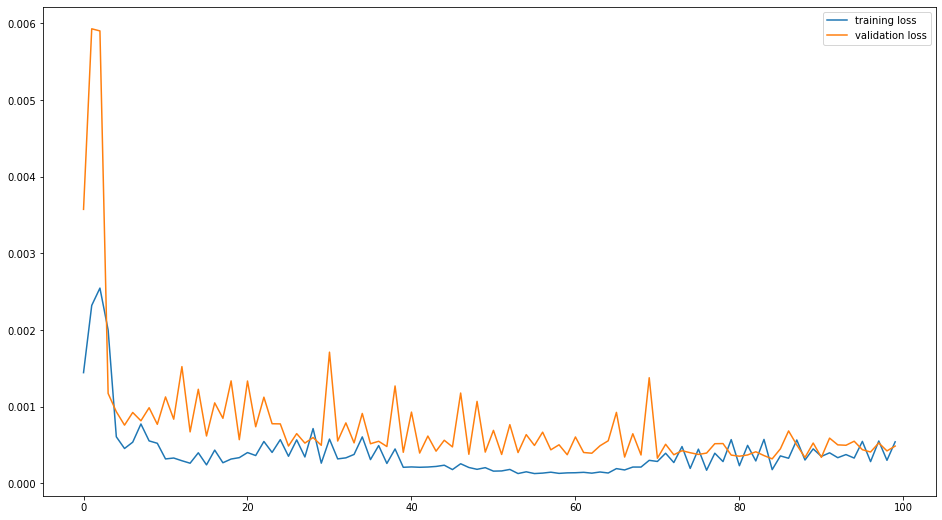

In [42]:
# Plotting the loss interation
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend();

# Note:
# if training loss >> validation loss -> Underfitting
# if training loss << validation loss -> Overfitting

### 4.10 Plot Predictions
___

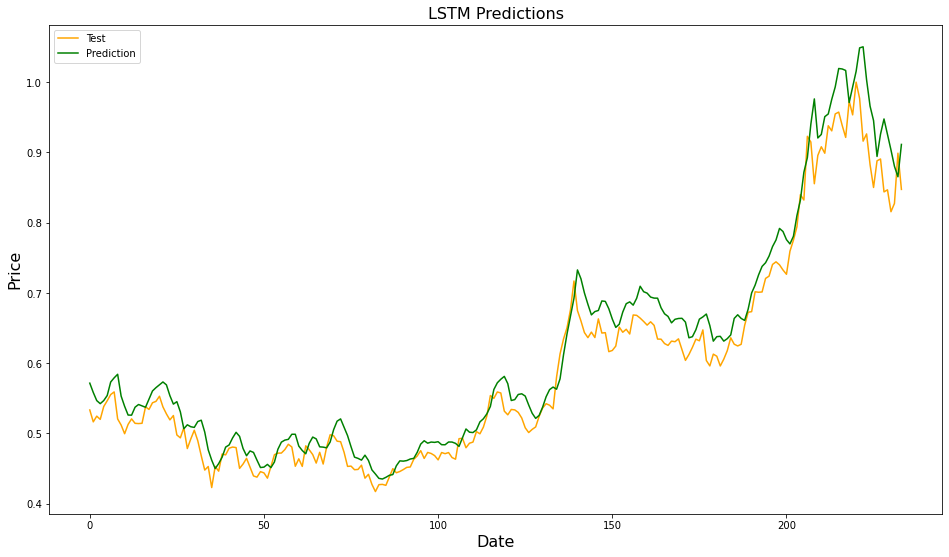

In [43]:
plt.figure(figsize=(16,9))
y_pred = model.predict(testX)
plt.plot(testY, color = 'orange', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'Prediction')
plt.title(label = 'LSTM Predictions', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.legend();

### 4.11 Evaluating Predictions
___

In [44]:
result = mape(testY,y_pred)

In [45]:
print(f'The average difference between the predicted value and the actual value is {result}%')

The average difference between the predicted value and the actual value is 4.581741176090148%


### 4.12 Plot 90-Day Forecast
___

In [46]:
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='2d').tolist()
forecast = model.predict(trainX[-n_future:])

In [47]:
forecast_copies = np.repeat(forecast, df1.shape[1], axis=-1)

In [48]:
forecast_copies.shape

(90, 6)

In [49]:
y_pred_future = min_max_scaler.inverse_transform(forecast_copies)[:,0]

In [50]:
y_pred_future.shape

(90,)

In [51]:
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())

In [52]:
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'open': y_pred_future})
df_forecast['date'] = pd.to_datetime(df_forecast['date'])

In [53]:
original = df[['date', 'open']]
original['date'] = pd.to_datetime(original['date'])
original = original.loc[original['date'] >= '2020-01-01']

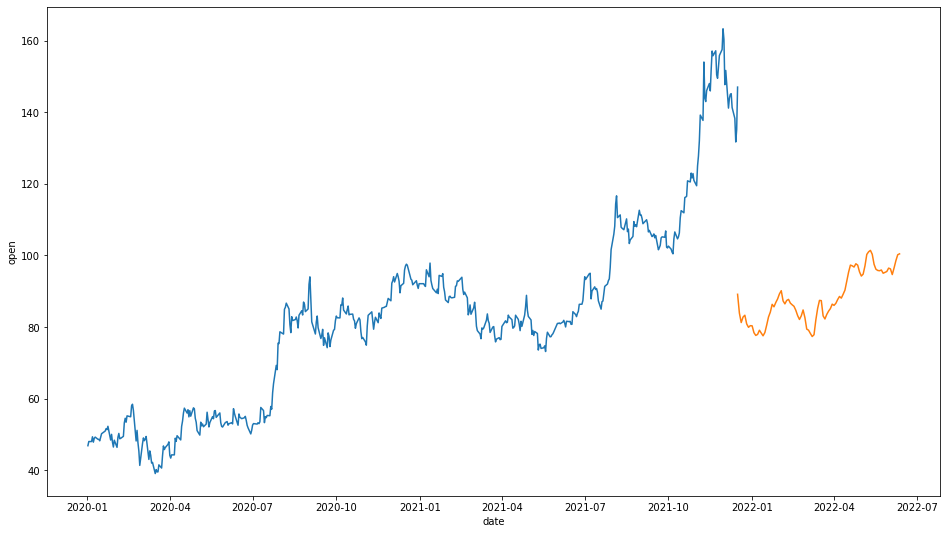

In [54]:
plt.figure(figsize=(16,9))
import seaborn as sns

sns.lineplot(original['date'], original['open'])
sns.lineplot(df_forecast['date'], df_forecast['open']);